In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
hp_df = pd.read_csv('house_price_data.csv')
hp_df.shape
hp_df.groupby('MSZoning').mean('SalePrice')
# plt.boxplot(hp_df['SalePrice'])      # Picturial Representation used to find Outliers
hp_df.columns                       # --> Column in pandas as a series 
hp_df.columns.value_counts()
hp_df.iloc[:,:]     # To access a particular column and particular rows
hp_df.iloc[:,-1::]  # To Access last elements 
hp_df[hp_df['SalePrice'] > 32000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
# Variables in data Frame 1. Continus 2. Catogorical 
hp_df['Street'].value_counts()
hp_df['Street'].unique()
(hp_df['Street'].value_counts())['Pave']
hp_df['SalePrice'].describe()
hp_df.columns
hp_df.dtypes
hp_df['MSSubClass'] = hp_df['MSSubClass'].astype(object)
hp_df.groupby(['MSZoning','Street']).mean('SalePrice')
hp_df.isnull().sum()                # isnull() --> Find the Missing value  sum() --> find the count of the missing -->Default axis = 0
hp_df.isnull().sum(axis = 1)        # Rows by null values 
hp_df.drop(column = 'LotFrontage',inplace = True)




TypeError: DataFrame.drop() got an unexpected keyword argument 'column'

C:\Users\pbandi\AppData\Local\Temp\ipykernel_18412\3137039280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp_df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

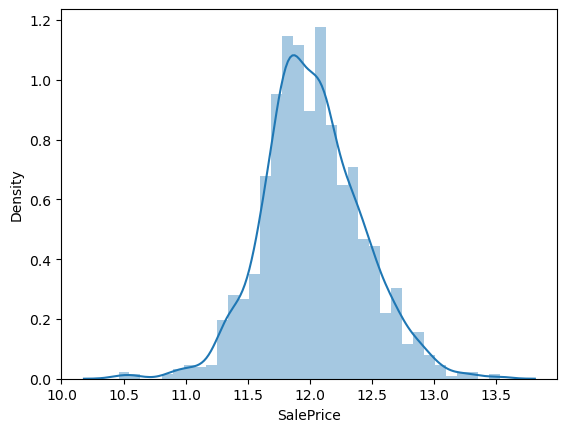

In [4]:
hp_df['SalePrice'] = np.log(hp_df['SalePrice'])
sns.distplot(hp_df['SalePrice'])

In [5]:
def print_(col):
    if col > 300000:
        return 'High Amount'
    else:
        return 'Low Amount'
hp_df['Amount Range'] = hp_df['SalePrice'].apply(print_)

In [6]:
hp_df['Logarithum Lot Area'] = hp_df['LotArea'].apply(np.log)
hp_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Amount Range,Logarithum Lot Area
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,12.247694,Low Amount,9.041922
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,12.109011,Low Amount,9.169518
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,12.317167,Low Amount,9.328123
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,11.849398,Low Amount,9.164296
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,12.429216,Low Amount,9.565214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,12.072541,Low Amount,8.976768
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,12.254863,Low Amount,9.486076
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130,Low Amount,9.109636
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,11.864462,Low Amount,9.181632


In [7]:
# If the 2 Variables of the Columns is continous in nature then we need to use PCC Prescion coefficent Corelation 
# using numpy we have to find 


""" IMP 
    1. PCC -- Pearson correlation coefficient 
              if the output p value < 0.05      : Correlated 
              if the output p value > 0.05      : Not Corrleated 
              
    np.corrcof(dateset[column1],dateset[column2])
"""

' IMP \n    1. PCC -- Pearson correlation coefficient \n              if the output p value < 0.05      : Correlated \n              if the output p value > 0.05      : Not Corrleated \n              \n    np.corrcof(dateset[column1],dateset[column2])\n'

In [34]:
pcc = np.corrcoef(hp_df['LotArea'],hp_df['SalePrice'])[0,1]
if pcc <  0.05 :
    print('Corelated')
else:
    print('Not Corelated')

Not Corelated


<Axes: >

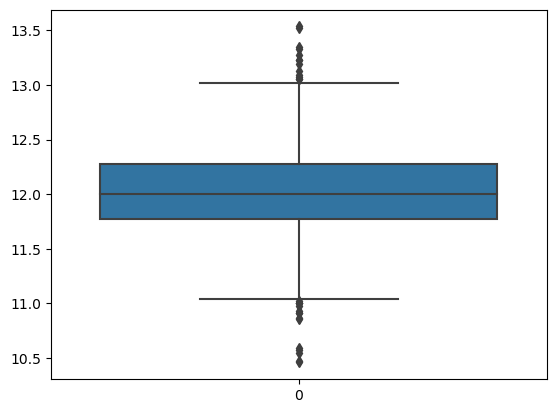

In [9]:
import seaborn as sns 
sns.boxplot(hp_df['SalePrice'])

C:\Users\pbandi\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


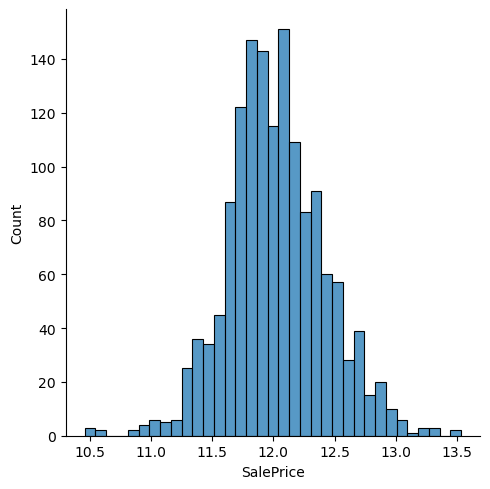

In [10]:
sns.displot(hp_df['SalePrice'])

C:\Users\pbandi\AppData\Local\Temp\ipykernel_18412\2452045780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp_df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

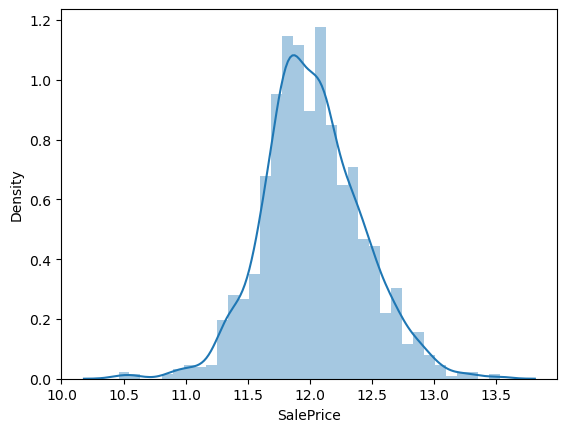

In [11]:
sns.distplot(hp_df['SalePrice'])

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

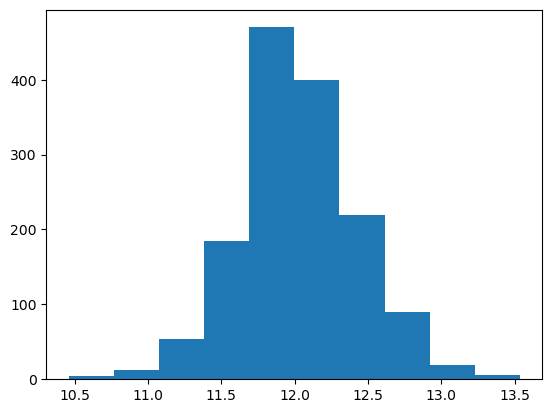

In [12]:
plt.hist(hp_df['SalePrice'])

In [13]:
#Function to get the outlier
def outliers(dataFrame,Column):
    Q3 = dataFrame[Column].describe()['75%']
    Q1 = dataFrame[Column].describe()['25%']
    outlier = []
    IQR = Q3 - Q1
    return [val for val in dataFrame[Column] if val > Q3 + (1.5*IQR)],[val for val in dataFrame[Column] if val < Q1 - (1.5*IQR)]
    
outliers(hp_df,'SalePrice')

([13.1260306447518,
  13.071070083016778,
  13.226723392728571,
  13.534473028231162,
  13.195613839143922,
  13.091904169919621,
  13.275827535915461,
  13.323926946863102,
  13.229567991666638,
  13.345506928718539,
  13.521139497361697,
  13.049792684569493,
  13.053013299269535],
 [10.596634733096073,
  11.018629143155449,
  11.002099841204238,
  10.460242108190519,
  10.578979797857352,
  11.002099841204238,
  10.915088464214607,
  10.858998997563564,
  10.932981961904135,
  10.47194980911048,
  10.542706391070517,
  11.002099841204238,
  10.915088464214607,
  10.868568448579715,
  10.976782033219948])

In [14]:
# Chi-Squire Testing   It is corelation between the 2 catogorical variables 
""" 
    Corelation check between MSZoing and LotShape (From hp_df) Dataframe
    
    Chi-Square Test :--> It is Hypothysis Test --> To Test the Corelation Betweeen two Catagorical Varaible 
    
    Steps for Hypothysis.
    1. Null Hypothysis (H0):No Corelation exist between the two Variables .
    2. Alternate Hypothysis (HA) : it is opposite of Hypothysis
    3. Set up the Confidence level 
        Confidence level = 0.95 , Significance Level = 1 - 0.95 = 0.05 
    4. Collect the Evidence 
    5. Calculate the chi-2 Test Statistics & P- Values 
    6. Conclude:  if p -values  from step(5) < significance level (0.05 ), Reject H0, Corelated
                  if p -values from steup(5) > Significance level (0.05), Fail to Reject H0, Not Corelated  
    
"""

' \n    Corelation check between MSZoing and LotShape (From hp_df) Dataframe\n    \n    Chi-Square Test :--> It is Hypothysis Test --> To Test the Corelation Betweeen two Catagorical Varaible \n    \n    Steps for Hypothysis.\n    1. Null Hypothysis (H0):No Corelation exist between the two Variables .\n    2. Alternate Hypothysis (HA) : it is opposite of Hypothysis\n    3. Set up the Confidence level \n        Confidence level = 0.95 , Significance Level = 1 - 0.95 = 0.05 \n    4. Collect the Evidence \n    5. Calculate the chi-2 Test Statistics & P- Values \n    6. Conclude:  if p -values  from step(5) < significance level (0.05 ), Reject H0, Corelated\n                  if p -values from steup(5) > Significance level (0.05), Fail to Reject H0, Not Corelated  \n    \n'

In [15]:
# chi-2 Testing 
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(hp_df['MSZoning'],hp_df['LotShape'])
p_value = chi2_contingency(observed_table)[1]
if p_value < 0.05:
    print('Correlated')
else:
    print('Not Correlated')

Correlated


In [16]:
# Compare all the catagorical variables with MSZoning & findout what are corelated and not 
cat_columns = [col for col in hp_df.columns if hp_df[col].dtype =='object']
def chi_2_contigency(columns,input_column):
    output = {} 
    for column in columns:
        if column != input_column:
            observed_table = pd.crosstab(hp_df[input_column],hp_df[column])
            p_value = chi2_contingency(observed_table)[1]
            if p_value < 0.05:
                output[column] = {'Correlated'}
            else:
                output[column] = {'Not Correlated'}
    return output
chi_2_contigency(cat_columns,'MSZoning')

{'MSSubClass': {'Correlated'},
 'Street': {'Correlated'},
 'Alley': {'Correlated'},
 'LotShape': {'Correlated'},
 'LandContour': {'Correlated'},
 'Utilities': {'Not Correlated'},
 'LotConfig': {'Correlated'},
 'LandSlope': {'Correlated'},
 'Neighborhood': {'Correlated'},
 'Condition1': {'Correlated'},
 'Condition2': {'Correlated'},
 'BldgType': {'Correlated'},
 'HouseStyle': {'Correlated'},
 'RoofStyle': {'Correlated'},
 'RoofMatl': {'Not Correlated'},
 'Exterior1st': {'Correlated'},
 'Exterior2nd': {'Correlated'},
 'MasVnrType': {'Not Correlated'},
 'ExterQual': {'Correlated'},
 'ExterCond': {'Correlated'},
 'Foundation': {'Correlated'},
 'BsmtQual': {'Correlated'},
 'BsmtCond': {'Correlated'},
 'BsmtExposure': {'Correlated'},
 'BsmtFinType1': {'Correlated'},
 'BsmtFinType2': {'Not Correlated'},
 'Heating': {'Correlated'},
 'HeatingQC': {'Correlated'},
 'CentralAir': {'Correlated'},
 'Electrical': {'Correlated'},
 'KitchenQual': {'Correlated'},
 'Functional': {'Not Correlated'},
 'Fir

In [17]:
from scipy.stats import f_oneway
RL_list = hp_df[hp_df['MSZoning'] == 'RL']['SalePrice']
RM_list = hp_df[hp_df['MSZoning'] == 'RM']['SalePrice']
FV_list = hp_df[hp_df['MSZoning'] == 'FV']['SalePrice']
RH_list = hp_df[hp_df['MSZoning'] == 'R']['SalePrice']
C_all_list = hp_df[hp_df['MSZoning'] == 'C (all)']['SalePrice']
f_oneway(RL_list,RM_list,FV_list,RH_list,C_all_list)

C:\Users\pbandi\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [18]:
# Annova is used for the corelation between the catogorical and continious variables 
columns = [col for col in hp_df.columns if hp_df[col].dtype == 'object']
def Anova(columns):
    output = {}
    for col in columns:
        catagorical =list(hp_df[col].value_counts().index)
        p_value = f_oneway(*[hp_df[hp_df[col] == cat ]['SalePrice']   for cat in catagorical])[1]
        if p_value < 0.05:
            output[col] = {'Correlated'}
        else:
            output[col] = {'Not Correlated'}
    return output
Anova(columns)

TypeError: at least two inputs are required; got 1.

In [28]:
from scipy.stats import chi2_contingency
observed_table = pd.crosstab(hp_df['MSSubClass'],hp_df['LotShape'])
p_value = chi2_contingency(observed_table)[1]
if p_value < 0.05:
    print('Corellated')
else:
    print('Not Corellated')

Corellated


In [29]:
np.corrcoef(hp_df['SalePrice'],hp_df['MSSubClass'])

AttributeError: 'float' object has no attribute 'shape'

In [47]:
import numpy as np
# p_value = np.corrcoef(hp_df['SalePrice'],hp_df['MSSubClass'])[0][1]
pcc = np.corrcoef(hp_df['MSSubClass'],hp_df['SalePrice'])[0][1]
# if pcc <  0.05 :
#     print('Corelated')
# else:
#     print('Not Corelated')

AttributeError: 'float' object has no attribute 'shape'

In [48]:
hp_df['MSSubClass'].dtype

dtype('O')

In [49]:
import statistics as stat

In [ ]:
stat